In [2]:
# 단순 Circle 모양과 X 모양을 구분해내는 프로그램
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

# 이미지를 감지하기 위한 클래스인 ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

np.random.seed(2)

In [3]:
train_datagen = ImageDataGenerator(rescale = 1/255)

# 총 40개의 훈련셋이 들어있는 경로와 크기를 확인하고
# 배치 사이즈는 4로 하여 총 5번 수행하면 한 epoch가 수행됨
train_generator = train_datagen.flow_from_directory(
                                'circle_X/train',
                                target_size=(25, 25), 
                                batch_size = 2,
                                class_mode = 'binary')

test_datagen = ImageDataGenerator(rescale = 1/255)

test_generator = test_datagen.flow_from_directory(
                                'circle_X/test',
                                target_size = (25, 25),
                                batch_size = 2,
                                class_mode = 'binary')

Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(24, 24, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 22, 22, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               819328    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 838,849
Trainable params: 838,849
Non-trainable params: 0
__________________________________________________

In [6]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [7]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=20,
        epochs=30,
        validation_data=test_generator,
        validation_steps=10)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
20/20 [==============================] - 0s 21ms/step - loss: 0.5585 - accuracy: 0.6000 - val_loss: 0.4267 - val_accuracy: 0.7500
Epoch 2/30
20/20 [==============================] - 0s 12ms/step - loss: 0.1459 - accuracy: 0.9250 - val_loss: 0.7193 - val_accuracy: 0.7000
Epoch 3/30
20/20 [==============================] - 0s 13ms/step - loss: 0.0399 - accuracy: 0.9750 - val_loss: 0.8712 - val_accuracy: 0.7000
Epoch 4/30
20/20 [==============================] - 0s 13ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.9249 - val_accuracy: 0.7000
Epoch 5/30
20/20 [==============================] - 0s 14ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.8837 - val_accuracy: 0.7000
Epoch 6/30
20/20 [==============================] - 0s 13ms/step - loss: 7.0519e-04 - accuracy: 1.0000 - val_loss: 1.0673 - val_accuracy: 0.7000
Epoch 7/30
20/20 [==============================] - 0s 14ms/step - loss: 4

79.4% 확률로 원


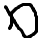

In [8]:
from keras.preprocessing.image import load_img, img_to_array
from IPython.display import Image

img = load_img('1.png', target_size=(24, 24, 3))
x = img_to_array(img)

x = x.reshape((1,) + x.shape)
x /= 255

y = model.predict(x)[0][0]
y = round(float(y), 3)

if y > 0.5:
    print(str(y*100) + "% 확률로 원")
else:
    print(str((1-y) * 100) + "% 확률로 엑스")
Image(filename='1.png')